In [89]:
import matplotlib.pyplot as plt
from math import exp
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)

df = pd.read_csv('kc_house_data_train.csv', index_col = 0)


In [90]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [91]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [92]:


# for l in df.columns:
#     ax.title = l
#     if (l != 'price'):
#         ax = sns.lmplot(x=l, y='price', data=df,fit_reg=True).fig
        

In [93]:
df['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [94]:
sns.distplot()

TypeError: distplot() missing 1 required positional argument: 'a'

In [95]:
target = df['price']
features = df[['bedrooms','bathrooms',
               'sqft_living', 'view','waterfront',
               'floors','condition', 'grade',
              'yr_built']]
features
#features.columns

,bedrooms,bathrooms,sqft_living,view,waterfront,floors,condition,grade,yr_built
0,4,2.25,2070,0,0,2.0,4,8,1986
1,5,3.00,2900,0,0,1.0,5,8,1977
2,4,2.50,3770,2,0,2.0,3,11,1997
3,3,3.50,4560,2,0,2.0,3,12,1990
4,3,2.50,2550,0,0,2.0,3,9,2004
...,...,...,...,...,...,...,...,...,...
17285,5,2.50,3240,1,0,1.0,3,8,1958
17286,2,1.75,1300,0,0,2.0,3,7,1948
17287,3,1.00,1050,0,0,1.0,3,7,1953
17288,3,1.50,1900,0,0,1.5,4,7,1971


In [96]:
#train data and test split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=10, test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 9) Target:  (13832,)
Training set - Features:  (3458, 9) Target:  (3458,)


In [97]:
#linear model
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("R^2 Score:", lm.score(X_train, y_train))



6479882.097922107
[-4.17406744e+04  5.06719852e+04  1.71671732e+02  4.10253602e+04
  6.23465267e+05  2.36699004e+04  2.11777137e+04  1.26712805e+05
 -3.73244201e+03]
R^2 Score: 0.6580604218416644


In [98]:
#make predictions from train
y_train_pred = lm.predict(X_train)

#perform tests on prediction
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 140491.80450053126
Mean Squared Error: 47795802549.14699
Root Mean Squared Error: 218622.51153334367


In [99]:
price_std = target.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.376331803358126
Root Mean Squared Error: 0.5856185299386257


Text(0, 0.5, 'Predictions')

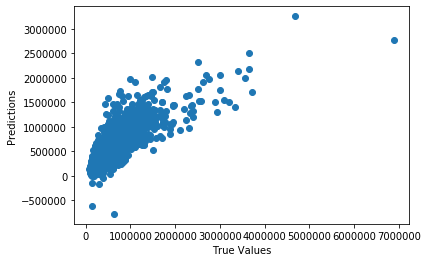

In [100]:
y_pred = lm.predict(X_test)

## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

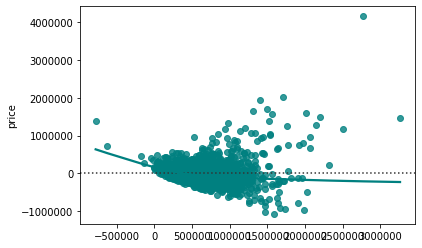

In [101]:
sns.residplot(y_pred, y_test, lowess=True, color="teal")

In [102]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.62352245802451


In [103]:
#calculate correlation coefficient for data
li = []
for key in features.keys():
    li.append("{}: {}".format(key, pearsonr(df['price'], df[key])))
li

['bedrooms: (0.3051057102681552, 0.0)',
 'bathrooms: (0.5243346054984268, 0.0)',
 'sqft_living: (0.7035403039789669, 0.0)',
 'view: (0.3954851030218899, 0.0)',
 'waterfront: (0.275778670804662, 2.465038317624179e-299)',
 'floors: (0.256985071851374, 7.67514444155681e-259)',
 'condition: (0.03609884124957833, 2.0554674592679736e-06)',
 'grade: (0.6662149551378924, 0.0)',
 'yr_built: (0.05645007489461683, 1.1017832792233933e-13)']

In [104]:
features.keys()

Index(['bedrooms', 'bathrooms', 'sqft_living', 'view', 'waterfront', 'floors',
       'condition', 'grade', 'yr_built'],
      dtype='object')

In [105]:
for key in features.keys():
    print(key)

bedrooms
bathrooms
sqft_living
view
waterfront
floors
condition
grade
yr_built


In [106]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [107]:
scale = MinMaxScaler()
transformed = scale.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns = X_train.columns)

In [108]:
target

0         365000.0
1         865000.0
2        1038000.0
3        1490000.0
4         711000.0
           ...    
17285     750000.0
17286     440000.0
17287     310000.0
17288     427500.0
17289     348000.0
Name: price, Length: 17290, dtype: float64

In [109]:
X_test.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
view           0
waterfront     0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64

In [110]:
X_train.isnull().sum()

bedrooms       0
bathrooms      0
sqft_living    0
view           0
waterfront     0
floors         0
condition      0
grade          0
yr_built       0
dtype: int64

In [111]:
#0.1 alpha ridge and lasso
ridge_01 = Ridge(alpha = 0.1)
ridge_01.fit(X_train, y_train)

lasso_01 = Lasso(alpha=0.1)
lasso_01.fit(X_train, y_train)
#basic linearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
#0.5 alpha ridge and lasso
ridge_05 = Ridge(alpha = 0.5)
ridge_05.fit(X_train, y_train)

lasso_05 = Lasso(alpha = 0.5)
lasso_05.fit(X_train, y_train)
#1 alpha ridge and lasso
ridge_1 = Ridge(alpha=1)
ridge_1.fit(X_train, y_train)

lasso_1 = Lasso(alpha = 1)
lasso_1.fit(X_train, y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [112]:
print("ridge .1 : {}\nridge .5 : {}\nridge 1 : {}".format(
        ridge_01.coef_.sum(), ridge_05.coef_.sum(), ridge_1.coef_.sum()))

ridge .1 : 3970887.862510624
ridge .5 : 3958388.6872454244
ridge 1 : 3943425.0809299643


In [113]:
print("lasso .1 : {}\nlasso .5 : {}\nlasso 1 : {}".format(
    lasso_01.coef_.sum(), lasso_05.coef_.sum(), lasso_1.coef_.sum()))

lasso .1 : 3974068.453766048
lasso .5 : 3973976.6167304786
lasso 1 : 3973859.7018137905


In [114]:
#predictions
y_pred_ridge_01_train = ridge_01.predict(X_train)
y_pred_test_01 = ridge_01.predict(X_test)

y_pred_lasso_01_train = lasso_01.predict(X_train)
y_pred_lasso_01_test = lasso_01.predict(X_test)

y_pred_lin_train = lin.predict(X_train)
y_pred_lin_test = lin.predict(X_test)

In [115]:
#residual sum of squares
print("train error ridge model : ", np.sum((y_train - y_pred_ridge_01_train)**2))
print('test error ridge model : ', np.sum((y_test - y_pred_test_01) ** 2))
print('train error lasso model : ', np.sum((y_train - y_pred_lasso_01_train) ** 2) )
print("test error lass model : ", np.sum((y_test - y_pred_lasso_01_test) ** 2))

train error ridge model :  661113846814474.9
test error ridge model :  6.431035571647149e+22
train error lasso model :  661111541017818.0
test error lass model :  6.50532533963413e+22


In [116]:
from sklearn.preprocessing import PolynomialFeatures

poly_5 = PolynomialFeatures(degree = 5, interaction_only=False)
#create new data frame transformed for poly5
df_poly_5 = pd.DataFrame(poly_5.fit_transform(features), columns = poly_5.get_feature_names(features.columns))
df_poly_5

,1,bedrooms,bathrooms,sqft_living,view,waterfront,floors,condition,grade,yr_built,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms view,bedrooms waterfront,bedrooms floors,bedrooms condition,bedrooms grade,bedrooms yr_built,bathrooms^2,bathrooms sqft_living,bathrooms view,bathrooms waterfront,bathrooms floors,bathrooms condition,bathrooms grade,bathrooms yr_built,sqft_living^2,sqft_living view,sqft_living waterfront,sqft_living floors,sqft_living condition,sqft_living grade,sqft_living yr_built,view^2,view waterfront,view floors,view condition,view grade,view yr_built,waterfront^2,waterfront floors,waterfront condition,waterfront grade,waterfront yr_built,floors^2,floors condition,floors grade,floors yr_built,condition^2,condition grade,condition yr_built,grade^2,grade yr_built,yr_built^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 view,bedrooms^2 waterfront,bedrooms^2 floors,bedrooms^2 condition,bedrooms^2 grade,bedrooms^2 yr_built,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms view,bedrooms bathrooms waterfront,bedrooms bathrooms floors,bedrooms bathrooms condition,bedrooms bathrooms grade,bedrooms bathrooms yr_built,bedrooms sqft_living^2,bedrooms sqft_living view,bedrooms sqft_living waterfront,bedrooms sqft_living floors,bedrooms sqft_living condition,bedrooms sqft_living grade,bedrooms sqft_living yr_built,bedrooms view^2,bedrooms view waterfront,bedrooms view floors,bedrooms view condition,bedrooms view grade,bedrooms view yr_built,bedrooms waterfront^2,bedrooms waterfront floors,bedrooms waterfront condition,bedrooms waterfront grade,bedrooms waterfront yr_built,bedrooms floors^2,bedrooms floors condition,bedrooms floors grade,bedrooms floors yr_built,bedrooms condition^2,bedrooms condition grade,bedrooms condition yr_built,bedrooms grade^2,bedrooms grade yr_built,bedrooms yr_built^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 view,bathrooms^2 waterfront,bathrooms^2 floors,bathrooms^2 condition,bathrooms^2 grade,bathrooms^2 yr_built,bathrooms sqft_living^2,bathrooms sqft_living view,bathrooms sqft_living waterfront,bathrooms sqft_living floors,bathrooms sqft_living condition,bathrooms sqft_living grade,bathrooms sqft_living yr_built,bathrooms view^2,bathrooms view waterfront,bathrooms view floors,bathrooms view condition,bathrooms view grade,bathrooms view yr_built,bathrooms waterfront^2,bathrooms waterfront floors,bathrooms waterfront condition,bathrooms waterfront grade,bathrooms waterfront yr_built,bathrooms floors^2,bathrooms floors condition,bathrooms floors grade,bathrooms floors yr_built,bathrooms condition^2,bathrooms condition grade,bathrooms condition yr_built,bathrooms grade^2,bathrooms grade yr_built,bathrooms yr_built^2,sqft_living^3,sqft_living^2 view,sqft_living^2 waterfront,sqft_living^2 floors,sqft_living^2 condition,sqft_living^2 grade,sqft_living^2 yr_built,sqft_living view^2,sqft_living view waterfront,sqft_living view floors,sqft_living view condition,sqft_living view grade,sqft_living view yr_built,sqft_living waterfront^2,...,view floors condition^2 grade,view floors condition^2 yr_built,view floors condition grade^2,view floors condition grade yr_built,view floors condition yr_built^2,view floors grade^3,view floors grade^2 yr_built,view floors grade yr_built^2,view floors yr_built^3,view condition^4,view condition^3 grade,view condition^3 yr_built,view condition^2 grade^2,view condition^2 grade yr_built,view condition^2 yr_built^2,view condition grade^3,view condition grade^2 yr_built,view condition grade yr_built^2,view condition yr_built^3,view grade^4,view grade^3 yr_built,view grade^2 yr_built^2,view grade yr_built^3,view yr_built^4,waterfront^5,waterfront^4 floors,waterfront^4 condition,waterfront^4 grade,waterfront^4 yr_built,waterfront^3 floors^2,waterfront^3 floors condition,waterfront^3 floors grade,waterfront^3 floors yr_built,waterfront^3 condition^2,waterfront^3 condition grade,waterfront^3 condition yr_built,waterfront^3 

In [117]:
X_train_p5, X_test_p5, y_train_05, y_test = train_test_split(df_poly_5, target, test_size=0.2, random_state = 10)

In [118]:
X_train_p5

,1,bedrooms,bathrooms,sqft_living,view,waterfront,floors,condition,grade,yr_built,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms view,bedrooms waterfront,bedrooms floors,bedrooms condition,bedrooms grade,bedrooms yr_built,bathrooms^2,bathrooms sqft_living,bathrooms view,bathrooms waterfront,bathrooms floors,bathrooms condition,bathrooms grade,bathrooms yr_built,sqft_living^2,sqft_living view,sqft_living waterfront,sqft_living floors,sqft_living condition,sqft_living grade,sqft_living yr_built,view^2,view waterfront,view floors,view condition,view grade,view yr_built,waterfront^2,waterfront floors,waterfront condition,waterfront grade,waterfront yr_built,floors^2,floors condition,floors grade,floors yr_built,condition^2,condition grade,condition yr_built,grade^2,grade yr_built,yr_built^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 view,bedrooms^2 waterfront,bedrooms^2 floors,bedrooms^2 condition,bedrooms^2 grade,bedrooms^2 yr_built,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms view,bedrooms bathrooms waterfront,bedrooms bathrooms floors,bedrooms bathrooms condition,bedrooms bathrooms grade,bedrooms bathrooms yr_built,bedrooms sqft_living^2,bedrooms sqft_living view,bedrooms sqft_living waterfront,bedrooms sqft_living floors,bedrooms sqft_living condition,bedrooms sqft_living grade,bedrooms sqft_living yr_built,bedrooms view^2,bedrooms view waterfront,bedrooms view floors,bedrooms view condition,bedrooms view grade,bedrooms view yr_built,bedrooms waterfront^2,bedrooms waterfront floors,bedrooms waterfront condition,bedrooms waterfront grade,bedrooms waterfront yr_built,bedrooms floors^2,bedrooms floors condition,bedrooms floors grade,bedrooms floors yr_built,bedrooms condition^2,bedrooms condition grade,bedrooms condition yr_built,bedrooms grade^2,bedrooms grade yr_built,bedrooms yr_built^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 view,bathrooms^2 waterfront,bathrooms^2 floors,bathrooms^2 condition,bathrooms^2 grade,bathrooms^2 yr_built,bathrooms sqft_living^2,bathrooms sqft_living view,bathrooms sqft_living waterfront,bathrooms sqft_living floors,bathrooms sqft_living condition,bathrooms sqft_living grade,bathrooms sqft_living yr_built,bathrooms view^2,bathrooms view waterfront,bathrooms view floors,bathrooms view condition,bathrooms view grade,bathrooms view yr_built,bathrooms waterfront^2,bathrooms waterfront floors,bathrooms waterfront condition,bathrooms waterfront grade,bathrooms waterfront yr_built,bathrooms floors^2,bathrooms floors condition,bathrooms floors grade,bathrooms floors yr_built,bathrooms condition^2,bathrooms condition grade,bathrooms condition yr_built,bathrooms grade^2,bathrooms grade yr_built,bathrooms yr_built^2,sqft_living^3,sqft_living^2 view,sqft_living^2 waterfront,sqft_living^2 floors,sqft_living^2 condition,sqft_living^2 grade,sqft_living^2 yr_built,sqft_living view^2,sqft_living view waterfront,sqft_living view floors,sqft_living view condition,sqft_living view grade,sqft_living view yr_built,sqft_living waterfront^2,...,view floors condition^2 grade,view floors condition^2 yr_built,view floors condition grade^2,view floors condition grade yr_built,view floors condition yr_built^2,view floors grade^3,view floors grade^2 yr_built,view floors grade yr_built^2,view floors yr_built^3,view condition^4,view condition^3 grade,view condition^3 yr_built,view condition^2 grade^2,view condition^2 grade yr_built,view condition^2 yr_built^2,view condition grade^3,view condition grade^2 yr_built,view condition grade yr_built^2,view condition yr_built^3,view grade^4,view grade^3 yr_built,view grade^2 yr_built^2,view grade yr_built^3,view yr_built^4,waterfront^5,waterfront^4 floors,waterfront^4 condition,waterfront^4 grade,waterfront^4 yr_built,waterfront^3 floors^2,waterfront^3 floors condition,waterfront^3 floors grade,waterfront^3 floors yr_built,waterfront^3 condition^2,waterfront^3 condition grade,waterfront^3 condition yr_built,waterfront^3 

In [119]:
#predictions
y_pred_ridge_01_train = ridge_01.predict(X_train_p5)
y_pred_test_01 = ridge_01.predict(X_test_p5)

y_pred_lasso_01_train = lasso_01.predict(X_train_p5)
y_pred_lasso_01_test = lasso_01.predict(X_test_p5)

y_pred_lin_train = lin.predict(X_train_p5)
y_pred_lin_test = lin.predict(X_test_p5)

ValueError: shapes (13832,2002) and (9,) not aligned: 2002 (dim 1) != 9 (dim 0)